# Welcome to image processing! (2)

Open and show an image

--2024-08-21 00:25:35--  https://sasiba.uchile.cl/index.php/s/zKzqsg2ZND7ZUQM/download
Resolving sasiba.uchile.cl (sasiba.uchile.cl)... 200.89.79.35
Connecting to sasiba.uchile.cl (sasiba.uchile.cl)|200.89.79.35|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 178448 (174K) [image/png]
Saving to: ‘chagas2.png’

chagas2.png         100%[===================>] 174.27K   184KB/s    in 0.9s    

2024-08-21 00:25:37 (184 KB/s) - ‘chagas2.png’ saved [178448/178448]



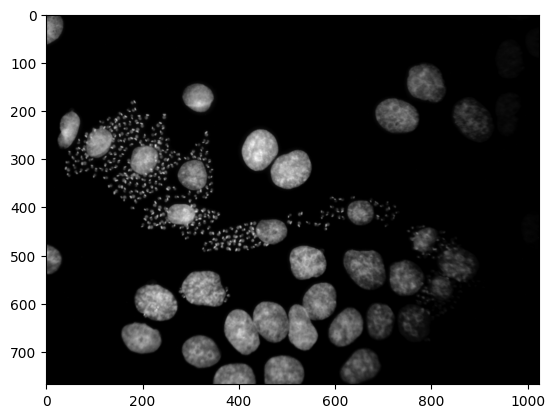

In [1]:
import numpy as np
from matplotlib.pyplot import imshow
from  skimage import filters, morphology, io, img_as_uint
%matplotlib inline

!wget --no-check-certificate  https://sasiba.uchile.cl/index.php/s/zKzqsg2ZND7ZUQM/download -O chagas2.png
image=io.imread('chagas2.png')
imshow(image, cmap='gray')

A global manual threshold

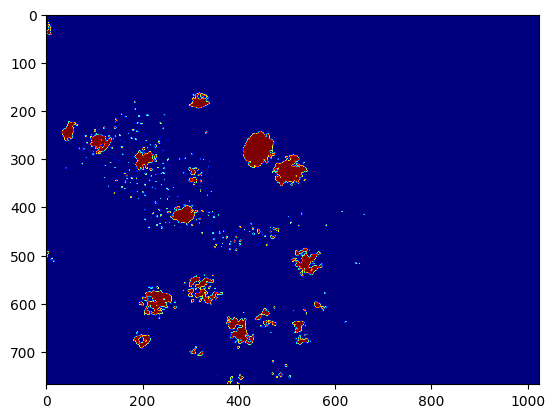

In [2]:
import numpy as np
from matplotlib.pyplot import imshow
from  skimage import filters, morphology, io, img_as_uint

threshold=100
image=io.imread('chagas2.png')
binary=image>threshold
imshow(binary, cmap='jet')

Building the histogram

<BarContainer object of 256 artists>

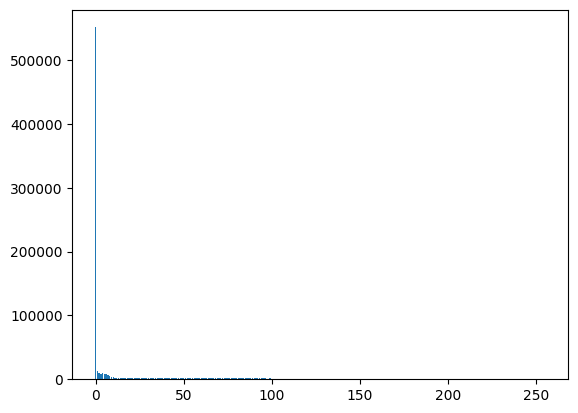

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from  skimage import filters, morphology, io, img_as_uint

#get histogram of an image
def getHistogram(gray_im):
    h=np.zeros(256, dtype=np.float32)
    for i in range(gray_im.shape[0]):
        for j in range(gray_im.shape[1]):
            h[gray_im[i,j]]+=1.0
    return h

image=io.imread('chagas2.png')
h = getHistogram( image )
plt.bar(range(0,256), h)

## Exercise: Threshold from kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CORRECT ME !!!


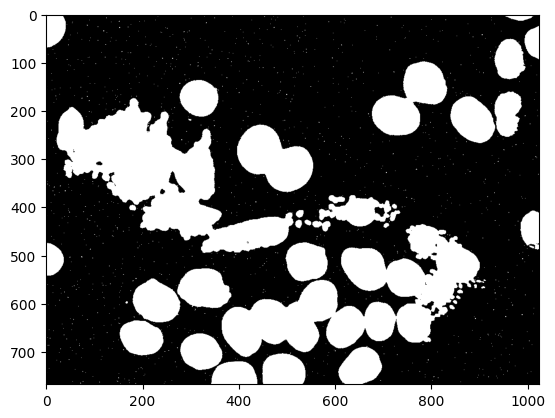

In [4]:
import numpy as np
from matplotlib.pyplot import imshow
from skimage import filters, morphology, io, img_as_uint
from sklearn.cluster import KMeans

def mythreshold(image):

    X=image.flatten().reshape(-1,1)
    #how many clusters?
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    #print (kmeans.cluster_centers_)

    print ('CORRECT ME !!!')
    #how to get a threshold from the centroids?
    threshold=0.0

    return threshold

image=io.imread('chagas2.png')
threshold = mythreshold(image)

binary=image>threshold

imshow(binary, cmap='gray')

## Exercise: Classification of pixels

--2024-08-21 00:27:18--  https://sasiba.uchile.cl/index.php/s/ezFpqiEmytGPm0r/download
Resolving sasiba.uchile.cl (sasiba.uchile.cl)... 200.89.79.35
Connecting to sasiba.uchile.cl (sasiba.uchile.cl)|200.89.79.35|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 1082 (1.1K) [image/png]
Saving to: ‘chagas2_foreground.png’

chagas2_foreground. 100%[===================>]   1.06K  --.-KB/s    in 0s      

2024-08-21 00:27:19 (365 MB/s) - ‘chagas2_foreground.png’ saved [1082/1082]

--2024-08-21 00:27:20--  https://sasiba.uchile.cl/index.php/s/NViiAbsfBYwpNwO/download
Resolving sasiba.uchile.cl (sasiba.uchile.cl)... 200.89.79.35
Connecting to sasiba.uchile.cl (sasiba.uchile.cl)|200.89.79.35|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 936 [image/png]
Saving to: ‘chagas2_background.png’

chagas2_background. 100%[===================>]     936

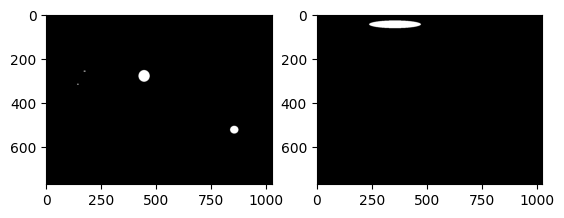

In [6]:
import numpy as np
from matplotlib.pyplot import imshow, subplot, plot
from skimage import filters, morphology, io, img_as_uint
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import scipy.ndimage as snd

#input image
image=io.imread('chagas2.png')
#more features
filtered1=snd.sobel(image)

#manual examples (labels to train)
!wget --no-check-certificate https://sasiba.uchile.cl/index.php/s/ezFpqiEmytGPm0r/download -O chagas2_foreground.png
!wget --no-check-certificate https://sasiba.uchile.cl/index.php/s/NViiAbsfBYwpNwO/download -O chagas2_background.png


class1=io.imread('chagas2_foreground.png')>0
class2=io.imread('chagas2_background.png')>0
subplot(1,2,1)
imshow(class1, cmap='gray')
subplot(1,2,2)
imshow(class2, cmap='gray')

In [7]:
#keep only pixels in the mask
class1_X_feature1=image[class1]
class1_X_feature2=filtered1[class1]

class2_X_feature1=image[class2]
class2_X_feature2=filtered1[class2]

#reshape to (examples, features)
X = np.zeros((class1_X_feature1.shape[0]+class2_X_feature1.shape[0],2))
y = np.zeros( class1_X_feature1.shape[0]+class2_X_feature1.shape[0])

#first feature
X[0:(class1_X_feature1.shape[0]),0]=class1_X_feature1
X[class1_X_feature1.shape[0]:,0]=class2_X_feature1
#second feature
X[0:(class1_X_feature1.shape[0]),1]=class1_X_feature2
X[class1_X_feature1.shape[0]:,1]=class2_X_feature2
#classes
y[0:(class1_X_feature1.shape[0])]=1
y[class1_X_feature1.shape[0]:]=0

#INSERT YOUR CODE HERE

#classify
#result = ...
#reshape to image
#output = result.reshape((image.shape[0], image.shape[1]))

#imshow(output, cmap='gray')

## Compare kmeans Vs randomForest segmentation

<Axes: >

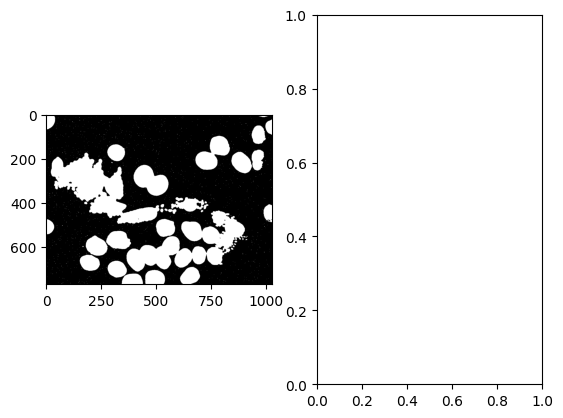

In [8]:
subplot(1,2,1)
imshow(binary, cmap='gray')
subplot(1,2,2)
#output should be the result of the binary classifier
#imshow(output, cmap='gray')